In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import imblearn 
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

# Reading Pre-processed CSV file :

In [2]:
df_reviews_ratings = pd.read_csv('PreProcessed_data.csv')
df_reviews_ratings.head(5)

,Reviews,Ratings,Orig_Reviews,no_of_characters,no_of_words,avd_Word_Length,Polarity,Subjectivity
0,horrible noise come washing spinning return ba...,1,Horrible noise coming while washing or spinnin...,712,116,5.129310,-0.069444,0.691667
1,make life easierwrite review month use wash ev...,5,It's made my life easier.Writing this review a...,1366,245,4.563265,0.096825,0.531746
2,would like share experience one onedelivery ex...,5,I would like to share my experience one by one...,2673,453,4.852097,0.229518,0.560618
3,medium could load washing machine got deliver ...,5,The media could not be loaded.\n ...,842,149,4.550336,0.300000,0.556667
4,medium could load defective product recievedth...,2,The media could not be loaded.\n ...,1369,227,4.933921,-0.154167,0.381859


In [3]:
df_reviews_ratings.isnull().sum()

Reviews             4
Ratings             0
Orig_Reviews        2
no_of_characters    0
no_of_words         0
avd_Word_Length     2
Polarity            0
Subjectivity        0
dtype: int64

In [4]:
df_reviews_ratings=df_reviews_ratings.dropna()

In [5]:
df_reviews_ratings=df_reviews_ratings.reset_index()

In [6]:
corpus= []
for i in range(0,len(df_reviews_ratings.Reviews)):
    text = ''.join(df_reviews_ratings.Reviews[i])
    corpus.append(text)

# TF-IDF :

 - Tf-idf is used to get the frequency of the words and hence has much impact on the models
 - where as CV only used 0's and 1's and gives equal importance to all the words .
 - Tf-idf focuses more on the frequency of the word in a sentences and the sentences as well 

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()
y = df_reviews_ratings.iloc[:,2].values

In [9]:
X.shape

(986, 2399)

In [10]:
y.shape

(986,)

# Balancing the data set using SMOTE : 

In [11]:
# As we are not having proper results with unbalanced data : 

In [12]:
sm =SMOTE(random_state = 100)          # SMOTENC(categorical_features=[0,1,2,3,4,9,10], random_state = 100)
x_sm,y_sm = sm.fit_resample(X, y)

In [40]:
c=np.bincount(y_sm)

In [48]:
smote_df = pd.DataFrame( c[1:] , [1,2,3,4,5] )

In [52]:
smote_df.transpose()

,1,2,3,4,5
0,516,516,516,516,516


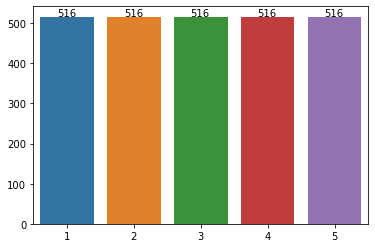

In [56]:
ax= sns.barplot(data = smote_df.transpose())
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.75))
plt.show()

In [57]:
# All the categories are balanced

In [58]:
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics

In [59]:
# splitting the data set into training set and test set
#Before Smote
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [60]:
# After smote

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(x_sm, y_sm, test_size = 0.25, random_state = 0)

In [61]:
X_train_sm.shape

(1935, 2399)

In [62]:
y_train_sm.shape

(1935,)

# Using all the ML models for CV : 

In [63]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier

In [64]:
# Result wothout SMOTE 

In [65]:
models=MultinomialNB(alpha=50) # range of alpha = 0-1
models.fit(X_train,y_train)
y_test_pred=models.predict(X_test)
print(str(models),"accuracy ::",metrics.accuracy_score(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

MultinomialNB(alpha=50) accuracy :: 0.5546558704453441
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        40
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        49
           5       0.55      1.00      0.71       137

    accuracy                           0.55       247
   macro avg       0.11      0.20      0.14       247
weighted avg       0.31      0.55      0.40       247



C:\Users\Mani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
models=[MultinomialNB(),LogisticRegression(multi_class='multinomial'),DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100,random_state=8,max_features = 2)]

for model in models:
    model.fit(X_train,y_train)
    y_test_pred=model.predict(X_test)
    print(str(model),"accuracy ::",metrics.accuracy_score(y_test,y_test_pred))
    #print(classification_report(y_test,y_test_pred))

MultinomialNB() accuracy :: 0.5506072874493927
LogisticRegression(multi_class='multinomial') accuracy :: 0.5910931174089069
DecisionTreeClassifier() accuracy :: 0.4251012145748988
RandomForestClassifier(max_features=2, random_state=8) accuracy :: 0.5344129554655871


### SVC :

In [67]:
# Grid search CV for rbf kernal : S

In [68]:
clf = SVC()
param_grid = [{'kernel':["rbf"],'gamma':[50,5,10,0.5,1,0.1,0.001,0.0001],'C':[1,15,14,13,12,11,10,0.1] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
gsv.best_params_ , gsv.best_score_ 

In [ ]:
# Grid search cv for linear kernal

In [ ]:
clf = SVC()
param_grid = [{'kernel':["linear"],'gamma':[50,5,10,0.5,1,0.1,0.001,0.0001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

In [ ]:
gsv.best_params_ , gsv.best_score_ 

In [ ]:
# After using SMOTE :

- Naive Bayes : Used MultinomialNB() as we have multiple classes in the target variable(Ratings : 1,2,3,4,5)
- Logistic regression : we used a parameter multi_class='multinomial' to indicate that the clossification is into multiple classes

In [71]:
model_performance = pd.DataFrame()

In [75]:
models=[MultinomialNB(),LogisticRegression(multi_class='multinomial'),DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100,random_state=8,max_features = 2)]
model_names = ['NaiveBayes','LogisticRegression','DecisionTree','RandomForest']
n = -1
for model in models:
    model.fit(X_train_sm,y_train_sm)
    y_test_pred_sm=model.predict(X_test_sm)
    print(str(model),"accuracy ::",metrics.accuracy_score(y_test_sm,y_test_pred_sm))
   # print(classification_report(y_test_sm,y_test_pred_sm))
  
    

MultinomialNB() accuracy :: 0.7085271317829457
LogisticRegression(multi_class='multinomial') accuracy :: 0.7705426356589147
DecisionTreeClassifier() accuracy :: 0.7286821705426356
RandomForestClassifier(max_features=2, random_state=8) accuracy :: 0.8635658914728682


In [ ]:
# Random forest classifier is giving an accuracy of 86% on test data 

In [69]:
model=RandomForestClassifier(n_estimators=100,random_state=8,max_features = 2)
model.fit(X_train_sm,y_train_sm)
y_pred_sm=model.predict(x_sm)
print(str(model),"accuracy ::",metrics.accuracy_score(y_sm,y_pred_sm))
clf_df=classification_report(y_sm,y_pred_sm,output_dict=True)

RandomForestClassifier(max_features=2, random_state=8) accuracy :: 0.9624031007751938


In [ ]:
new = pd.DataFrame.from_dict(clf_df) 

In [ ]:
new

# Accuracy of the whole data is 96% with random forest

In [ ]:
Converting them into 